<a href="https://colab.research.google.com/github/JoaquinGonzalezSimon/Data_science_and_ML_from_Medium/blob/main/220606_Stress_Detection_with_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This project was taken from the following link and I use it to practice my skills

https://thecleverprogrammer.com/2021/12/20/stress-detection-with-machine-learning/#google_vignette

https://medium.com/coders-camp/180-data-science-and-machine-learning-projects-with-python-6191bc7b9db9

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/stress.csv')

In [3]:
data.head(2)

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,1.000,1.125,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,1.125,1.000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857


In [4]:
data.isnull().sum().sort_values()

subreddit          0
lex_liwc_death     0
lex_liwc_relig     0
lex_liwc_money     0
lex_liwc_home      0
                  ..
lex_liwc_negate    0
lex_liwc_conj      0
lex_liwc_adverb    0
lex_liwc_anx       0
sentiment          0
Length: 116, dtype: int64

In [5]:
import nltk
import re
import string
from nltk.corpus import stopwords

In [6]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer('english')
stopword = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stopword

In [8]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [9]:
def clean(text):
  text = str(text).lower()
  text = re.sub('\[.*?\]', '', text)
  text = re.sub('https?://\S+|www\.\S+', '', text)
  text = re.sub('<.*?>+', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\n', '', text)
  text = re.sub('\w*\d\w*', '', text)
  text = [word for word in text.split(' ') if word not in stopword]
  text = ' '.join(text)
  text = [stemmer.stem(word) for word in text.split(' ')]
  text = ' '.join(text)
  return text

In [10]:
data['text2'] = data['text'].apply(clean)

In [11]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [12]:
text_detect = ' '.join(i for i in data.text2)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(text_detect)

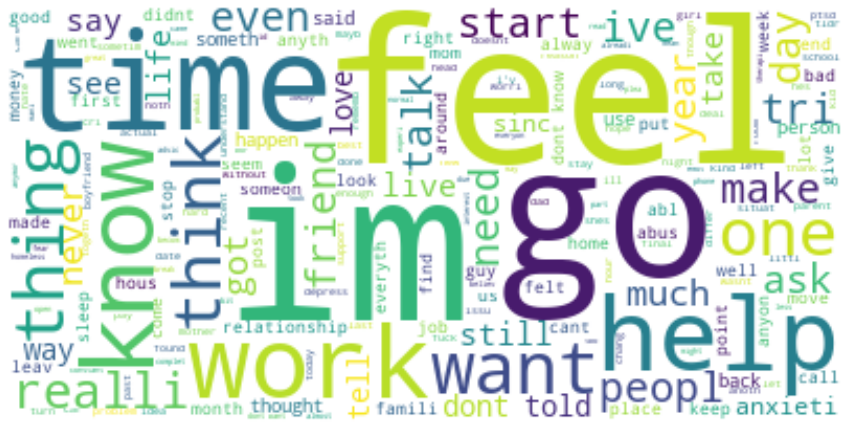

In [17]:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [19]:
data['stress_label'] = data['label'].map({0:'No Stress', 1:'Stress'})
data2 = data[['text2', 'stress_label']]

In [20]:
data2.head()

,text2,stress_label
0,said felt way sugget go rest trigger ahead you...,Stress
1,hey rassist sure right place post goe im curr...,No Stress
2,mom hit newspap shock would know dont like pla...,Stress
3,met new boyfriend amaz kind sweet good student...,Stress
4,octob domest violenc awar month domest violenc...,Stress


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
x = np.array(data2['text2'])
y = np.array(data2['stress_label'])

In [23]:
cv = CountVectorizer()
X = cv.fit_transform(x)

In [24]:
# Random state to match exercise
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.33, random_state=42)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((1901, 7842), (937, 7842), (1901,), (937,))

In [27]:
from sklearn.naive_bayes import BernoulliNB

In [28]:
model = BernoulliNB()
model.fit(xtrain, ytrain)

BernoulliNB()

In [29]:
user = input('Enter a text: ')
data_eval = cv.transform([user]).toarray()
output = model.predict(data_eval)
print(output)

Enter a text: People need to take care of their mental health
['No Stress']


In [30]:
user = input('Enter a text: ')
data_eval = cv.transform([user]).toarray()
output = model.predict(data_eval)
print(output)

Enter a text: Sometime I feel like I need some help
['Stress']
